# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


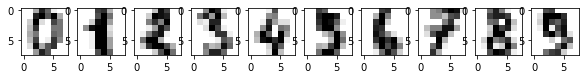

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
## code here
scalerdata = preprocessing.StandardScaler().fit(data.loc[:,'x1':'x64'])
data_transform=scalerdata.transform(data.loc[:,'x1':'x64'])  

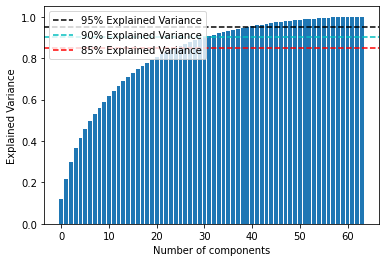

In [6]:
#Plot explained variance per number of leading PC's 
pca = PCA(data_transform.shape[1])
data311P=pca.fit_transform(data_transform)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=64
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()
plt.show()


#describe in a few words what you can infer from the above plot
20 components could reach 80% explained variance, while 40 components could reach 95% explained variance

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

C:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


[Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, '')]

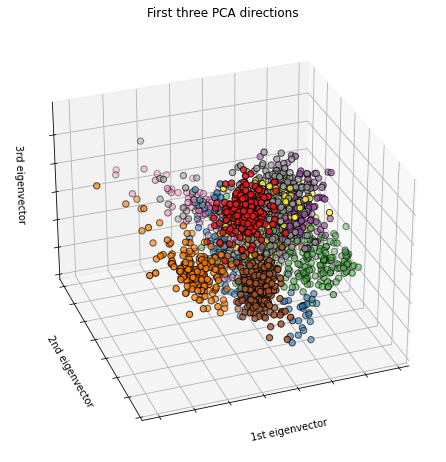

In [8]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.Spectral(np.linspace(0, 1, 10))

## code here
pca = PCA(3)
data311P=pca.fit_transform(data_transform)
eigenvalues = pca.explained_variance_ratio_
ax.scatter(
    data311P[:, 0],
    data311P[:, 1],
    data311P[:, 2],
    c=data['y'],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

In [9]:
## code here
pca = PCA(2)
lower_dimensional_data = pca.fit_transform(data_transform)
eigenvalues = pca.explained_variance_ratio_
low_2 = pca.inverse_transform(lower_dimensional_data)

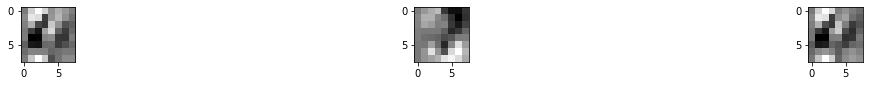

In [10]:
plt.figure(figsize=(20,1))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(low_2[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

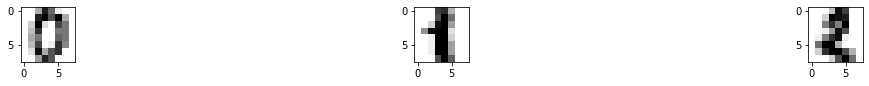

In [11]:
plt.figure(figsize=(20,1))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [12]:
lower_dimensional_data

array([[ 1.91420674, -0.95451297],
       [ 0.58898828,  0.92463961],
       [ 1.30204076, -0.31722558],
       ...,
       [ 1.02260139, -0.14787753],
       [ 1.07606218, -0.38089385],
       [-1.25771065, -2.22758027]])

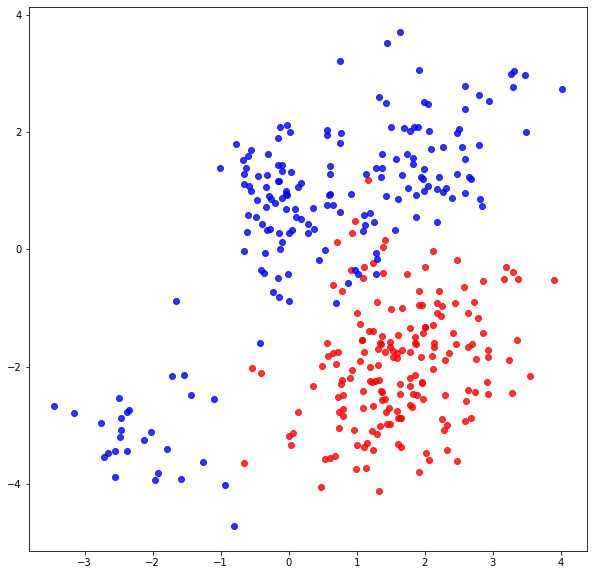

In [14]:
colors=('red','blue','black','yellow','green')
fig = plt.figure(figsize=(10,10))
for d in [0,1]:
    plt.plot(np.array(data311P[y==d,0]), np.array(data311P[y==d,1]),'o', color=colors[d], alpha=0.8, label=d)

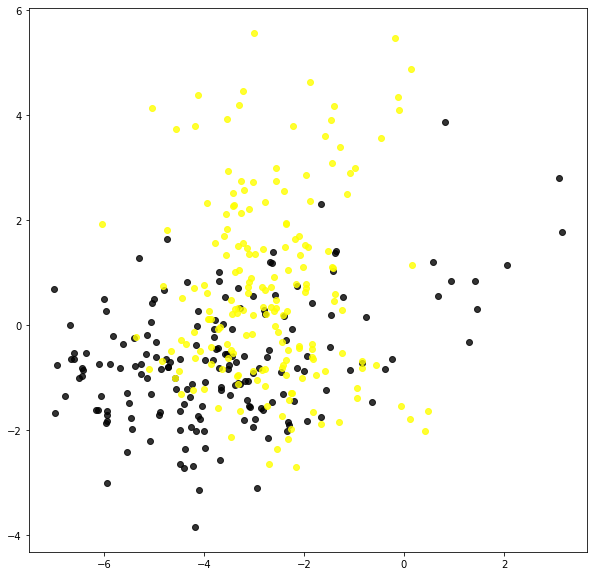

In [15]:
fig = plt.figure(figsize=(10,10))
for d in [2,3]:
    plt.plot(np.array(data311P[y==d,0]), np.array(data311P[y==d,1]),'o', color=colors[d], alpha=0.8, label=d)

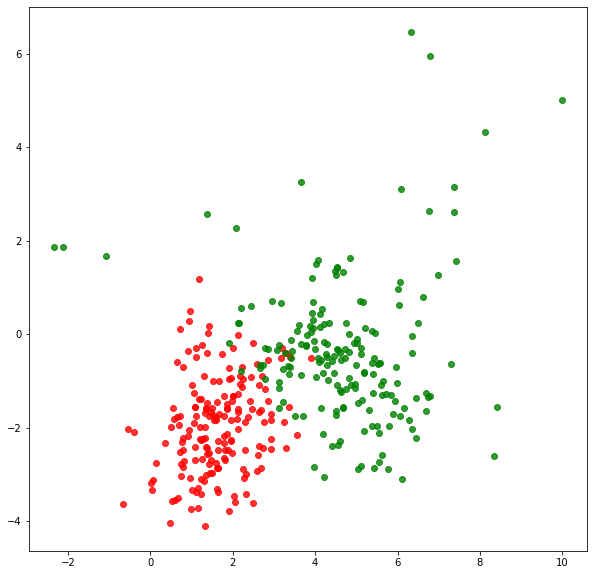

In [16]:
fig = plt.figure(figsize=(10,10))
for d in [0,4]:
    plt.plot(np.array(data311P[y==d,0]), np.array(data311P[y==d,1]),'o', color=colors[d], alpha=0.8, label=d)

## 2. PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [44]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [45]:
## code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, Y_train, Y_test = train_test_split(data.loc[:,'x1':'x15'], data['Y'], test_size=0.3, random_state=1)

In [46]:
## report mean out-of-sample R2 score
lm=sm.OLS(Y_train,X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              9.072
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                    6.75e-06
Time:                        23:27:58   Log-Likelihood:                         -36.538
No. Observations:                  35   AIC:                                      103.1
Df Residuals:                      20   BIC:                                      126.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# We can see from the p-value, if the p-value is less than 0.05, then the regressor is significant. So the X7 X8 and X15 are significant

In [20]:
Y_pred=lm.predict(X_test)
print('out of sample accurary is :',r2_score(Y_test,Y_pred))

out of sample accurary is : 0.09624945139851893


### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy

In [21]:
## run PCA
## code here
scaler = preprocessing.StandardScaler().fit(data.loc[:,'x1':'x15'])
data_transform=scaler.transform(data.loc[:,'x1':'x15'])  
pca = PCA(data_transform.shape[1])
data311P=pca.fit_transform(data_transform)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


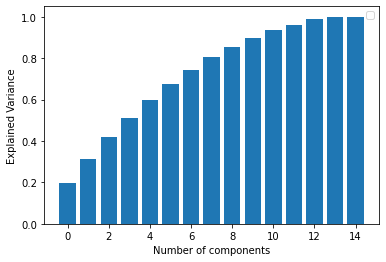

In [22]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
n=15
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.legend(loc='best')
plt.show()
plt.show()

<BarContainer object of 15 artists>

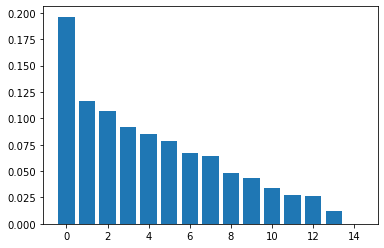

In [23]:
## choose leading number of PCs as regressors and run linear regression again
plt.bar(np.arange(n), eigenvalues)

In [24]:
## report out of sample mean R2 score
pca = PCA(n_components = 0.85)
data311P=pca.fit_transform(data_transform)
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.19633708, 0.11627246, 0.10719635, 0.09199459, 0.08537818,
       0.0786158 , 0.06725482, 0.06393611, 0.04858412])

In [25]:
np.random.seed(0)
R_IS=[]; R_OS=[]
n=100 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'x1':'x15'],data['Y'],test_size=0.3)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    pca = PCA(9)
    P_train=pca.fit_transform(scaler.transform(X_train)) 
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.588+-0.088
OS R-squared is 0.108+-0.345


## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

In [26]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [27]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2022ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [28]:
#merge income data with 311
data_merge=pd.merge(dataIncome,data311,on='Zip')
data_merge

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.000000
10002,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.000000
10003,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.000000
10004,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.000000
10005,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,50291.2065,64694.3772,54915,0.004151,0.000109,0.000983,0.0,0.000000,0.000437,0.001202,...,0.000109,0.000328,0.003168,0.001638,0.000218,0.002403,0.000655,0.035172,0.0,0.000000
11433,41780.0631,54771.0096,28391,0.004549,0.000000,0.002123,0.0,0.000152,0.000910,0.000910,...,0.000000,0.000303,0.009553,0.000303,0.000455,0.006520,0.001668,0.041092,0.0,0.000000
11434,51640.5104,59039.1065,52603,0.003540,0.000000,0.002056,0.0,0.000114,0.000914,0.001370,...,0.000114,0.000000,0.004454,0.000457,0.000343,0.003084,0.001370,0.048767,0.0,0.000000


### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [29]:
from sklearn.metrics import r2_score
X=data_merge.iloc[:,3:]
Y=data_merge.Mean
np.random.seed(1234)
R_IS=[]; R_OS=[]
n=100 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3)
    res=sm.OLS(y_train,X_train).fit()   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is -6.021+-9.115


### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

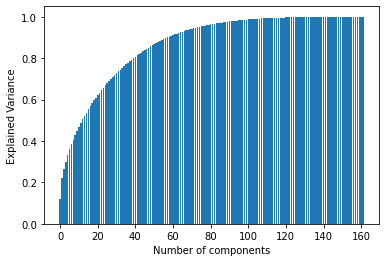

In [30]:
# apply PCA first for whole data
scalerincome = preprocessing.StandardScaler().fit(X)
income_transform=scalerincome.transform(X)
pca = PCA(income_transform.shape[1])
data311P=pca.fit_transform(income_transform)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=162
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [31]:
## plot explained variance and chose N leading PCs (choose N either by explained variance or try different values and choose best one)
pca = PCA(n_components = 0.85)
incomeP=pca.fit_transform(income_transform)
eigenvalues = pca.explained_variance_ratio_
len(eigenvalues)

48

In [32]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)
R_IS=[]; R_OS=[]
np.random.seed(2022)
n=100 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(incomeP),Y,test_size=0.3)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    pca = PCA(len(eigenvalues))
    P_train=pca.fit_transform(scaler.transform(X_train)) 
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.938+-0.013
OS R-squared is -0.378+-1.100


In [33]:
pca = PCA(n_components = 0.75)
incomeP=pca.fit_transform(income_transform)
eigenvalues = pca.explained_variance_ratio_
len(eigenvalues)

34

In [34]:
R_IS=[]; R_OS=[]
np.random.seed(2022)
n=100 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(incomeP),Y,test_size=0.3)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    pca = PCA(len(eigenvalues))
    P_train=pca.fit_transform(scaler.transform(X_train)) 
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.907+-0.016
OS R-squared is -0.194+-0.974


### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [35]:
## code here
from sklearn.linear_model import Lasso
scalerincome = preprocessing.StandardScaler().fit(X)
income_transform=scalerincome.transform(X)
pca = PCA(income_transform.shape[1])
data311P=pca.fit_transform(income_transform)
np.random.seed(0)
R_OS=[]
n=100
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data311P,Y,test_size=0.3)
    clf =Lasso(alpha=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    R_OS.append(r2_score(y_pred,y_test))

print('out-of-sample R2 =',np.mean(R_OS))

out-of-sample R2 = 0.17989221941039316


In [36]:
np.random.seed(2022)
R_IS=[]; R_OS=[]
n=100
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3) 
    clf = Lasso(10000) 
    res = clf.fit(X_train,y_train)
    y_pred = res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is -0.033+-0.043


### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [37]:
## code here
X_train, X_test, y_train, y_test = train_test_split(data311P,Y,test_size=0.3,random_state = 1234)
X_train_1, X_vail, y_train_1, y_vail = train_test_split(X_train,y_train,test_size=0.3,random_state = 1234)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':range(1,10000)}
dt=Lasso()
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train_1,y_train_1)
print(rs.best_params_)

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.159e+06, tolerance: 8.252e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.882e+06, tolerance: 8.031e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+07, tolerance: 1.083e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+07, tolerance: 8.031e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e+07, tolerance: 9.350e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.779e+07, tolerance: 8.252e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+07, tolerance: 1.083e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+07, tolerance: 8.031e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.248e+07, tolerance: 8.252e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.167e+07, tolerance: 1.083e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.968e+07, tolerance: 8.252e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.601e+06, tolerance: 8.252e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+07, tolerance: 1.068e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

{'alpha': 2410}


In [42]:
np.random.seed(0)
R_OS=[]
n=100
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data311P,Y,test_size=0.3)
    clf =Lasso(alpha=2410)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    R_OS.append(r2_score(y_pred,y_test))

print('out-of-sample R2 =',np.mean(R_OS))

out-of-sample R2 = 0.5127707412525406


In [41]:
np.random.seed(0)

R_IS=[]; R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data311P,Y,test_size=0.3)
    X_train_1, X_vail, y_train_1, y_vail = train_test_split(X_train,y_train,test_size=0.3)
    clf = Lasso(n) 
    res = clf.fit(X_train_1,y_train_1)
    y_pred = res.predict(X_vail)
    R_OS.append(r2_score(y_vail,y_pred))
print('OS R-squared is',np.mean(R_OS))

OS R-squared is 0.4961024810163492
